In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df = pd.read_csv('/content/twitter.csv')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [10]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+|@\S+|#\S+|[^A-Za-z0-9\s]', '', tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Display the first few rows of the dataframe after cleaning
df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,cleaned_text
0,upset update facebook texting might cry result...,upset update facebook texting might cry result...
1,dived many times ball managed save 50 rest go ...,dived many times ball managed save 50 rest go ...
2,whole body feels itchy like fire,whole body feels itchy like fire
3,behaving mad see,behaving mad see
4,whole crew,whole crew


In [21]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text,cleaned_text
26453,Negative,soo lucky get dye hair mom let dye hair,soo lucky get dye hair mom let dye hair
28512,Negative,saw cutest large format kodak cameras today ex...,saw cutest large format kodak cameras today ex...
13874,Negative,wish closer saving,wish closer saving
41896,Negative,sorry baby come tonight,sorry baby come tonight
7905,Negative,external hdd sometimes fails get recognized wi...,external hdd sometimes fails get recognized wi...
26624,Negative,aws poor amp heidi makes sick xd,aws poor amp heidi makes sick xd
9902,Negative,sometimes wonder money goes,sometimes wonder money goes
10682,Negative,long long day got track northampton 12 30 raci...,long long day got track northampton 12 30 raci...
20692,Negative,back work tomorrow school holidays,back work tomorrow school holidays
34745,Negative,back grind zach dermo appointment warts still,back grind zach dermo appointment warts still


In [22]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [23]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [24]:
df.text = df.text.apply(lambda x: preprocess(x))

In [25]:
from wordcloud import WordCloud

# Check how many positive sentiment rows exist
num_positive = len(df[df.sentiment == 'Positive'])
print("Number of positive sentiments:", num_positive)

# Print the first positive sentiment row, if any
if num_positive > 0:
    print(df[df.sentiment == 'Positive'].iloc[0]['text'])
    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
    plt.imshow(wc , interpolation = 'bilinear')
else:
    print("No positive sentiments found, cannot generate wordcloud.") # Tell the user why the wordcloud isn't being generated

Number of positive sentiments: 0
No positive sentiments found, cannot generate wordcloud.


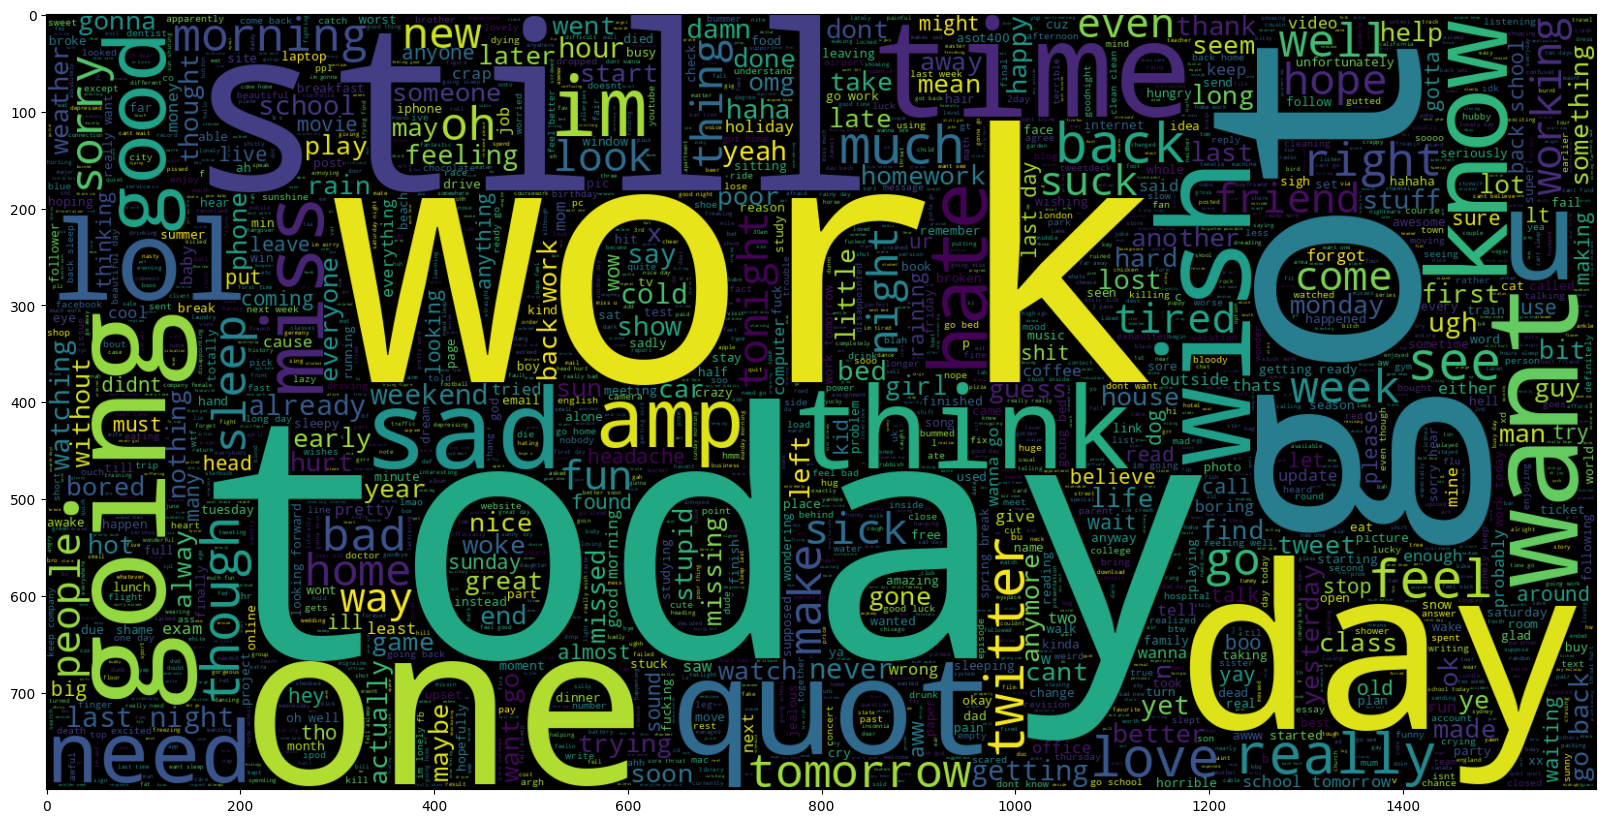

In [19]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [27]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Display the first few rows of the dataframe with sentiment scores
df[['cleaned_text', 'sentiment_score']].head()


,cleaned_text,sentiment_score
0,upset update facebook texting might cry result...,-0.7269
1,dived many times ball managed save 50 rest go ...,0.4939
2,whole body feels itchy like fire,-0.2500
3,behaving mad see,-0.4939
4,whole crew,0.0000


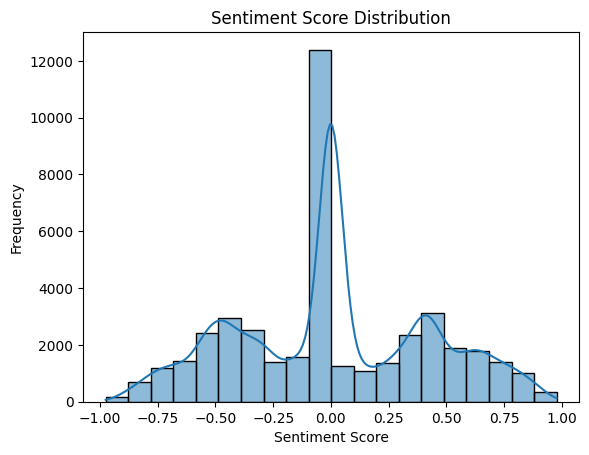

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment score distribution
sns.histplot(df['sentiment_score'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


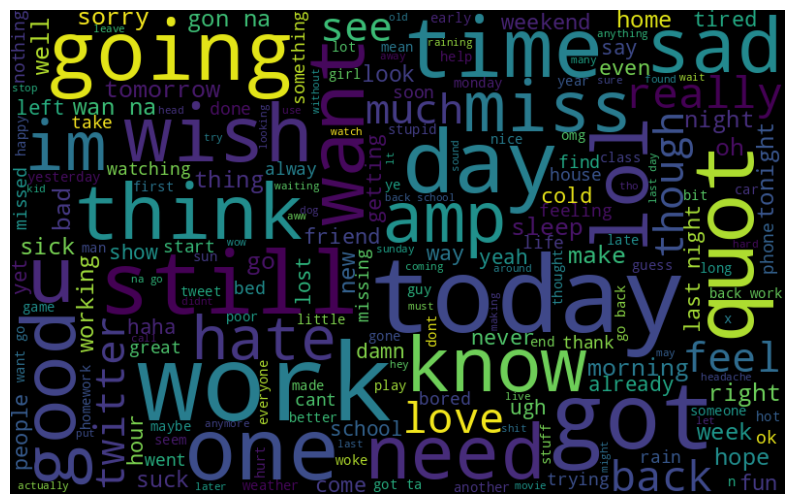

In [30]:
from wordcloud import WordCloud

# Combine all cleaned tweets into one string
all_words = ' '.join([text for text in df['cleaned_text']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [31]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [32]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 33897
Test Data size 8475


In [33]:
train_data.head(10)

,sentiment,text,cleaned_text,sentiment_score
35393,Negative,please say raiding unknown spamming canzorz,please say raiding unknown spamming canzorz,-0.2023
22254,Negative,feels sick stomach crazy busy weekend,feels sick stomach crazy busy weekend,-0.6908
41069,Negative,front tooth hurts soo bad,front tooth hurts soo bad,-0.7650
35573,Negative,cause unknown death 21 polo ponies wellington,cause unknown death 21 polo ponies wellington,-0.5994
13995,Negative,glad safe worry prairie chicks,glad safe worry prairie chicks,0.4588
34228,Negative,internet creating problems,internet creating problems,-0.1280
34898,Negative,quot empire sun quot author dies grey skies be...,quot empire sun quot author dies grey skies be...,0.0516
3667,Negative,writ ticketbot thing spamming people tickets b...,writ ticketbot thing spamming people tickets b...,-0.4767
30674,Negative,getting sick,getting sick,-0.5106
31695,Negative,college lol x still dont get twitter,college lol x still dont get twitter,0.4215


In [34]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 26872


In [35]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (33897, 30)
Testing X Shape: (8475, 30)


In [36]:
labels = train_data.sentiment.unique().tolist()

In [37]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (33897, 1)
y_test shape: (8475, 1)


In [38]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-07-15 16:16:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-07-15 16:16:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-07-15 16:16:08--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [39]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [69]:
!ls /kaggle/input/


In [70]:
# Replace 'glove-embeddings' with the actual directory name you found
!ls /kaggle/input/glove-embeddings/


ls: cannot access '/kaggle/input/glove-embeddings/': No such file or directory


In [77]:
import numpy as np

# Step 1: List all datasets in the /kaggle/input/ directory
!ls /kaggle/input/

# Step 2: Identify the correct directory name from the output
# For example, if you see 'glove6b', use it in the next step

# Step 3: List files in the identified GloVe directory
!ls /kaggle/input/glove6b/

# Step 4: Update the path based on the correct directory name
GLOVE_EMB = '/content/glove.6B.300d.txt'  # Update this path based on the actual directory name
embeddings_index = {}

# Use a try-except block to handle potential file errors
try:
    with open(GLOVE_EMB, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Found %s word vectors.' % len(embeddings_index))
except FileNotFoundError:
    print("Error: File not found at", GLOVE_EMB)
    print("Please check if the file exists and the path is correct.")


ls: cannot access '/kaggle/input/glove6b/': No such file or directory
Found 400000 word vectors.


In [59]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [60]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [72]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [62]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [63]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [64]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [73]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
34/34 [==============================] - 57s 2s/step - loss: 0.6283 - accuracy: 1.0000 - val_loss: 0.6202 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
34/34 [==============================] - 57s 2s/step - loss: 0.6131 - accuracy: 1.0000 - val_loss: 0.6052 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
34/34 [==============================] - 49s 1s/step - loss: 0.5983 - accuracy: 1.0000 - val_loss: 0.5906 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
34/34 [==============================] - 50s 1s/step - loss: 0.5839 - accuracy: 1.0000 - val_loss: 0.5764 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
34/34 [==============================] - 49s 1s/step - loss: 0.5698 - accuracy: 1.0000 - val_loss: 0.5626 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
34/34 [==============================] - 48s 1s/step - loss: 0.5562 - accuracy: 1.0000 - val_loss: 0.5491 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
34/34 [==============================] - 48s 1s/step - loss: 0.5429 - a

In [75]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Assuming MAX_SEQUENCE_LENGTH and embedding_layer are defined elsewhere
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(sequence_input, outputs)

# Define learning rate
LR = 0.001  # or any other value you want to use

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1,
                              patience=3,
                              min_lr=0.00001,
                              monitor='val_loss',
                              verbose=1)

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='model_checkpoint.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

# Print the model summary
model.summary()

# Example of fitting the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[reduce_lr, checkpoint])


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           8061600   
                                                                 
 spatial_dropout1d_3 (Spati  (None, 30, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_3 (Conv1D)           (None, 26, 64)            96064     
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 512)               6604

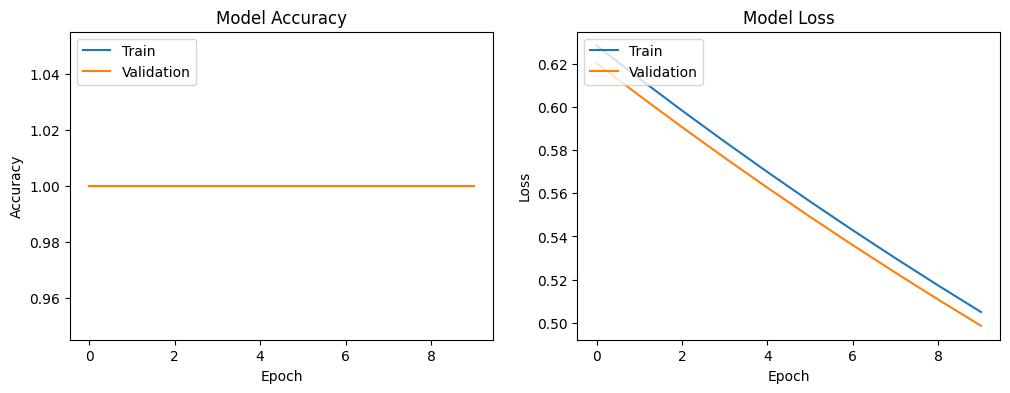

In [76]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the training history returned by model.fit()
def plot_learning_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Assuming 'history' is the result of model.fit(...)
# history = model.fit(...)
plot_learning_curves(history)


In [52]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 8s 8s/step


In [53]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

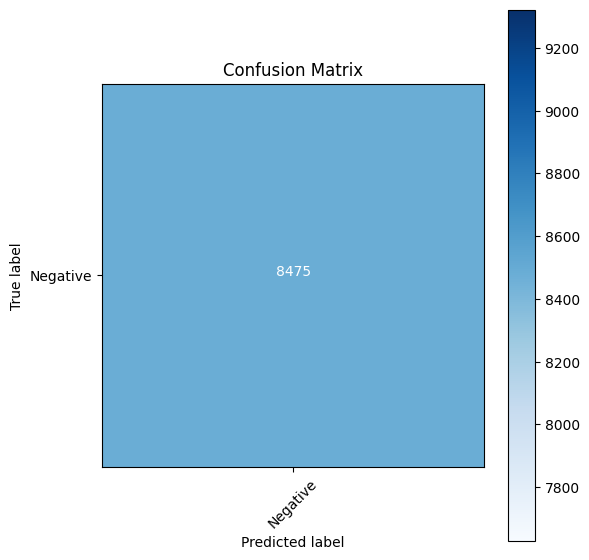

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'test_data' is a DataFrame and 'y_pred_1d' is your prediction array

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_data['sentiment'].to_list(), y_pred_1d)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=test_data['sentiment'].unique(), title="Confusion Matrix")
plt.show()


In [79]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      8475

    accuracy                           1.00      8475
   macro avg       1.00      1.00      1.00      8475
weighted avg       1.00      1.00      1.00      8475

